In [67]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.examples.tutorials.mnist import input_data

In [68]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [71]:
# hyporhesis using softmax
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.argmax(Y, 1)) 

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost = 8.128990260
Epoch: 0002 cost = 4.322289653
Epoch: 0003 cost = 3.069047746
Epoch: 0004 cost = 2.449430847
Epoch: 0005 cost = 2.084853565
Epoch: 0006 cost = 1.845489235
Epoch: 0007 cost = 1.675782694
Epoch: 0008 cost = 1.548384526
Epoch: 0009 cost = 1.448937284
Epoch: 0010 cost = 1.368532317
Epoch: 0011 cost = 1.301464764
Epoch: 0012 cost = 1.244547057
Epoch: 0013 cost = 1.195688106
Epoch: 0014 cost = 1.152993860
Epoch: 0015 cost = 1.115351675
Epoch: 0016 cost = 1.081842869
Epoch: 0017 cost = 1.051448864
Epoch: 0018 cost = 1.024317511
Epoch: 0019 cost = 0.999465500
Epoch: 0020 cost = 0.976544715
Epoch: 0021 cost = 0.955691998
Epoch: 0022 cost = 0.936354307
Epoch: 0023 cost = 0.918306254
Epoch: 0024 cost = 0.901599544
Epoch: 0025 cost = 0.885949723
Epoch: 0026 cost = 0.871249637
Epoch: 0027 cost = 0.857448200
Epoch: 0028 cost = 0.844453289
Epoch: 0029 cost = 0.832107548
Epoch: 0030 cost = 0.820460782
Epoch: 0031 cost = 0.809292501
Epoch: 0032 cost = 0.798922684
Epoch: 0

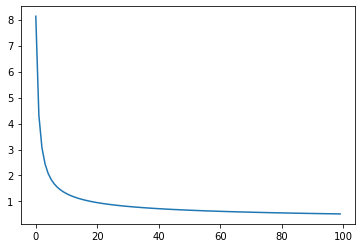

In [72]:
# parameters
training_epochs = 100 
batch_size = 1000

sess = tf.Session()
# Initialize TensorFlow variables 
sess.run(tf.global_variables_initializer()) 

# Training cycle
cost_val=[]
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
        
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys}) 
        avg_cost += c / total_batch
    
    cost_val.append(avg_cost)
            
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

pred = sess.run(hypothesis,feed_dict={X:mnist.test.images})
result = np.apply_along_axis(np.argmax, 1, pred)
real = np.apply_along_axis(np.argmax, 1, mnist.test.labels)
acc = sum(result == real)/10000

plt.plot(range(training_epochs),cost_val)
print(acc)

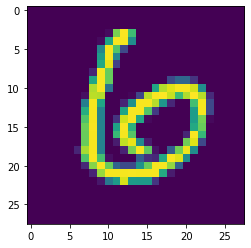

In [51]:
plt.imshow(mnist.test.images[11:12,:].reshape(28,28))